In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
import hvplot.pandas
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [2]:
#Import Csv
file_path= "Customer_Churn_database.csv"
customer_churn_df=pd.read_csv(file_path)
customer_churn_small=customer_churn_df.sample(100000)
customer_churn_small.head()

,customer_id,age,city,gender,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,...,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,auto_renewed,transaction_date,membership_expire_date,cancelled,is_churn
2557780,UfYdRJ/ikEaykdMLRs+hU/wQXJusa7lN0i5kfSY6Su0=,45,13,male,9,20131214,20170317,0,0,0,...,13103.70,40,30,149,149,1,20170315,20170417,0,0
5477426,dx08oVQKjkX9xdVdUMkzARmEk5xtdDKuhAKNvoVi2l8=,35,13,male,9,20040413,20170308,2,1,2,...,9696.92,37,30,149,149,1,20170307,20170408,0,0
1871912,Bqm0aY17P6PvcSYsqqY2yH3e3IeHwHK1u+2eJ4C+9N8=,17,5,female,7,20151110,20170307,2,0,0,...,3652.54,41,30,99,99,1,20170310,20170410,0,0
2516005,Gs/8Kxxw321kGjmaN0Wgfu2FD+u8rl1+5mfDb7+J7tU=,20,13,female,9,20100427,20170319,6,1,1,...,3208.14,31,30,149,149,1,20170331,20170430,0,0
7909531,J3eGz4V12HoFcOWDtJLRUBPazuOurC18SygwTaBR0s8=,20,1,male,3,20150215,20170318,8,6,1,...,5843.69,38,30,149,149,0,20170330,20170430,0,1


# Data preprocessing 

In [3]:
#Investigate all the elements within each feature

for columns in customer_churn_small:
        unique_values=np.unique(customer_churn_small[columns])
        nr_values=len(unique_values)
        if nr_values<=10:
            print("The number of values per feature {} is -- {}.".format(columns, nr_values,unique_values))
        else:
            print("The number of values for feature {} is:{}".format(columns, nr_values))

The number of values for feature customer_id is:81200
The number of values for feature age is:128
The number of values for feature city is:21
The number of values per feature gender is -- 2.
The number of values per feature registered_via is -- 5.
The number of values for feature registered_on is:4701
The number of values for feature date_streamed is:31
The number of values for feature less_than_25 is:203
The number of values for feature less_than_50 is:87
The number of values for feature less_than_75 is:49
The number of values for feature less_than_985 is:79
The number of values for feature above_985 is:419
The number of values for feature unique_songs is:313
The number of values for feature total_secs is:93914
The number of values for feature payment_method_id is:32
The number of values for feature payment_plan_days is:27
The number of values for feature plan_list_price is:33
The number of values for feature actual_amount_paid is:33
The number of values per feature auto_renewed is --

In [4]:
#Remove ages below 15 and higher than 80
min_age=15
max_age=80
column='age'

customer_churn_small=customer_churn_small[customer_churn_small[column].between(min_age,max_age)]
customer_churn_small

,customer_id,age,city,gender,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,...,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,auto_renewed,transaction_date,membership_expire_date,cancelled,is_churn
2557780,UfYdRJ/ikEaykdMLRs+hU/wQXJusa7lN0i5kfSY6Su0=,45,13,male,9,20131214,20170317,0,0,0,...,13103.70,40,30,149,149,1,20170315,20170417,0,0
5477426,dx08oVQKjkX9xdVdUMkzARmEk5xtdDKuhAKNvoVi2l8=,35,13,male,9,20040413,20170308,2,1,2,...,9696.92,37,30,149,149,1,20170307,20170408,0,0
1871912,Bqm0aY17P6PvcSYsqqY2yH3e3IeHwHK1u+2eJ4C+9N8=,17,5,female,7,20151110,20170307,2,0,0,...,3652.54,41,30,99,99,1,20170310,20170410,0,0
2516005,Gs/8Kxxw321kGjmaN0Wgfu2FD+u8rl1+5mfDb7+J7tU=,20,13,female,9,20100427,20170319,6,1,1,...,3208.14,31,30,149,149,1,20170331,20170430,0,0
7909531,J3eGz4V12HoFcOWDtJLRUBPazuOurC18SygwTaBR0s8=,20,1,male,3,20150215,20170318,8,6,1,...,5843.69,38,30,149,149,0,20170330,20170430,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045177,KZK/4wxGtf2+NXlmpRaG/abCyS7JgoaJBrQ5JAbMvEc=,20,11,female,9,20130902,20170330,5,1,2,...,3352.99,39,30,149,149,1,20170228,20170421,0,0
5735450,C5MZTeqITFjjTFM+yPbJ55BWyW4EJVpyNAe2HR9JddI=,37,15,male,4,20160622,20170331,5,0,0,...,14241.30,40,30,149,149,1,20170329,20170529,0,0
4391721,9BktSjj/To+EQv42c/H/bbR3rjYqnQSkQ/yVHWYKFpg=,32,4,female,9,20050130,20170305,0,1,0,...,2936.56,39,30,149,149,1,20170331,20170521,0,0
3990249,E/SeAzzc0SycYP0TlZ7EKd5Gv7XiQqVAvmtPqoUJkCg=,33,4,female,9,20110130,20170326,6,1,0,...,5777.24,40,30,149,149,1,20170316,20170415,0,0


In [5]:
#Create bins of ages 
bins=[15,20,29,39,49,59,69,80]
labels=['age_15_19','age_20_29','age_30_39','age_40_49','age_50_59','age_60_69','age_70_80']
customer_churn_small['Age_group']=pd.cut(customer_churn_small['age'],bins=bins, labels=labels, right=False)
customer_churn_small

#Drop the age column
customer_churn_small=customer_churn_small.drop(columns=['age'])
customer_churn_small

,customer_id,city,gender,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,...,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,auto_renewed,transaction_date,membership_expire_date,cancelled,is_churn,Age_group
2557780,UfYdRJ/ikEaykdMLRs+hU/wQXJusa7lN0i5kfSY6Su0=,13,male,9,20131214,20170317,0,0,0,1,...,40,30,149,149,1,20170315,20170417,0,0,age_40_49
5477426,dx08oVQKjkX9xdVdUMkzARmEk5xtdDKuhAKNvoVi2l8=,13,male,9,20040413,20170308,2,1,2,2,...,37,30,149,149,1,20170307,20170408,0,0,age_30_39
1871912,Bqm0aY17P6PvcSYsqqY2yH3e3IeHwHK1u+2eJ4C+9N8=,5,female,7,20151110,20170307,2,0,0,0,...,41,30,99,99,1,20170310,20170410,0,0,age_15_19
2516005,Gs/8Kxxw321kGjmaN0Wgfu2FD+u8rl1+5mfDb7+J7tU=,13,female,9,20100427,20170319,6,1,1,2,...,31,30,149,149,1,20170331,20170430,0,0,age_20_29
7909531,J3eGz4V12HoFcOWDtJLRUBPazuOurC18SygwTaBR0s8=,1,male,3,20150215,20170318,8,6,1,12,...,38,30,149,149,0,20170330,20170430,0,1,age_20_29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045177,KZK/4wxGtf2+NXlmpRaG/abCyS7JgoaJBrQ5JAbMvEc=,11,female,9,20130902,20170330,5,1,2,0,...,39,30,149,149,1,20170228,20170421,0,0,age_20_29
5735450,C5MZTeqITFjjTFM+yPbJ55BWyW4EJVpyNAe2HR9JddI=,15,male,4,20160622,20170331,5,0,0,0,...,40,30,149,149,1,20170329,20170529,0,0,age_30_39
4391721,9BktSjj/To+EQv42c/H/bbR3rjYqnQSkQ/yVHWYKFpg=,4,female,9,20050130,20170305,0,1,0,0,...,39,30,149,149,1,20170331,20170521,0,0,age_30_39
3990249,E/SeAzzc0SycYP0TlZ7EKd5Gv7XiQqVAvmtPqoUJkCg=,4,female,9,20110130,20170326,6,1,0,1,...,40,30,149,149,1,20170316,20170415,0,0,age_30_39


In [6]:
# Use get_dummies() to convert categorical variables.
customer_churn_dummies=customer_churn_small.drop(columns=["customer_id"])
customer_churn_dummies


,city,gender,registered_via,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,above_985,...,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,auto_renewed,transaction_date,membership_expire_date,cancelled,is_churn,Age_group
2557780,13,male,9,20131214,20170317,0,0,0,1,48,...,40,30,149,149,1,20170315,20170417,0,0,age_40_49
5477426,13,male,9,20040413,20170308,2,1,2,2,36,...,37,30,149,149,1,20170307,20170408,0,0,age_30_39
1871912,5,female,7,20151110,20170307,2,0,0,0,12,...,41,30,99,99,1,20170310,20170410,0,0,age_15_19
2516005,13,female,9,20100427,20170319,6,1,1,2,12,...,31,30,149,149,1,20170331,20170430,0,0,age_20_29
7909531,1,male,3,20150215,20170318,8,6,1,12,10,...,38,30,149,149,0,20170330,20170430,0,1,age_20_29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045177,11,female,9,20130902,20170330,5,1,2,0,12,...,39,30,149,149,1,20170228,20170421,0,0,age_20_29
5735450,15,male,4,20160622,20170331,5,0,0,0,54,...,40,30,149,149,1,20170329,20170529,0,0,age_30_39
4391721,4,female,9,20050130,20170305,0,1,0,0,10,...,39,30,149,149,1,20170331,20170521,0,0,age_30_39
3990249,4,female,9,20110130,20170326,6,1,0,1,21,...,40,30,149,149,1,20170316,20170415,0,0,age_30_39


In [7]:
customer_churn_dummies= pd.get_dummies(customer_churn_dummies,columns=["city","gender","registered_via", "payment_plan_days", "plan_list_price", "payment_method_id", "registered_via","Age_group"])
customer_churn_dummies

,registered_on,date_streamed,less_than_25,less_than_50,less_than_75,less_than_985,above_985,unique_songs,total_secs,actual_amount_paid,...,registered_via_7,registered_via_9,registered_via_13,Age_group_age_15_19,Age_group_age_20_29,Age_group_age_30_39,Age_group_age_40_49,Age_group_age_50_59,Age_group_age_60_69,Age_group_age_70_80
2557780,20131214,20170317,0,0,0,1,48,49,13103.70,149,...,0,1,0,0,0,0,1,0,0,0
5477426,20040413,20170308,2,1,2,2,36,19,9696.92,149,...,0,1,0,0,0,1,0,0,0,0
1871912,20151110,20170307,2,0,0,0,12,9,3652.54,99,...,1,0,0,1,0,0,0,0,0,0
2516005,20100427,20170319,6,1,1,2,12,13,3208.14,149,...,0,1,0,0,1,0,0,0,0,0
7909531,20150215,20170318,8,6,1,12,10,30,5843.69,149,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045177,20130902,20170330,5,1,2,0,12,20,3352.99,149,...,0,1,0,0,1,0,0,0,0,0
5735450,20160622,20170331,5,0,0,0,54,59,14241.30,149,...,0,0,0,0,0,1,0,0,0,0
4391721,20050130,20170305,0,1,0,0,10,11,2936.56,149,...,0,1,0,0,0,1,0,0,0,0
3990249,20110130,20170326,6,1,0,1,21,27,5777.24,149,...,0,1,0,0,0,1,0,0,0,0


In [8]:
customer_churn_dummies.shape

(96848, 146)

# Feature selection

In [9]:
#Split the data into X & y
X=customer_churn_dummies.drop('is_churn', axis=1).values
y=customer_churn_dummies['is_churn']

print (X.shape)
print (y.shape)

(96848, 145)
(96848,)


In [10]:
#Run radom Forest Classifier
df=RandomForestClassifier(random_state=15,criterion="entropy", max_depth=10)
df.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=15)

In [11]:
#Running feature importance 
fi_col=[]
fi=[]
for i, column in enumerate(customer_churn_dummies.drop(columns = ['is_churn'])):
    print("The feature importance for {} is : {}".format(column,df.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(df.feature_importances_[i])

The feature importance for registered_on is : 0.01024200932293698
The feature importance for date_streamed is : 0.0019720497080348135
The feature importance for less_than_25 is : 0.0018104473267496768
The feature importance for less_than_50 is : 0.0014007218598066165
The feature importance for less_than_75 is : 0.001208692346882849
The feature importance for less_than_985 is : 0.0011597327383734322
The feature importance for above_985 is : 0.0022752935309834515
The feature importance for unique_songs is : 0.0023337061033538477
The feature importance for total_secs is : 0.0028801676415300876
The feature importance for actual_amount_paid is : 0.1250161621878522
The feature importance for auto_renewed is : 0.060042494055235034
The feature importance for transaction_date is : 0.16351968273937087
The feature importance for membership_expire_date is : 0.22898381623816547
The feature importance for cancelled is : 0.03546968018393397
The feature importance for city_1 is : 0.0003784146037486954

The feature importance for registered_via_3 is : 0.001285950069685608
The feature importance for registered_via_4 is : 0.0006235089321651945
The feature importance for registered_via_7 is : 0.007391201424399667
The feature importance for registered_via_9 is : 0.00447165427885573
The feature importance for registered_via_13 is : 7.326442990604744e-07
The feature importance for Age_group_age_15_19 is : 0.0007031636107304186
The feature importance for Age_group_age_20_29 is : 0.0006501760789406035
The feature importance for Age_group_age_30_39 is : 0.0006586311390145937
The feature importance for Age_group_age_40_49 is : 0.0005364618954112804
The feature importance for Age_group_age_50_59 is : 0.0002275998473422219
The feature importance for Age_group_age_60_69 is : 7.688365567659367e-05
The feature importance for Age_group_age_70_80 is : 3.0558074151255714e-05


In [12]:
#Create a dataframe with feature importance
fi_df=zip(fi_col, fi)
fi_df=pd.DataFrame(fi_df,columns=["Feature", "Feature Importance"])
fi_df=fi_df.sort_values('Feature Importance', ascending=False).reset_index()
fi_df
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fi_df)

     index                 Feature  Feature Importance
0       12  membership_expire_date        2.289838e-01
1       11        transaction_date        1.635197e-01
2        9      actual_amount_paid        1.250162e-01
3       49    payment_plan_days_30        1.134577e-01
4       10            auto_renewed        6.004249e-02
5       13               cancelled        3.546968e-02
6      123    payment_method_id_32        2.297920e-02
7       79     plan_list_price_149        2.282295e-02
8       68       plan_list_price_0        1.991294e-02
9       65   payment_plan_days_410        1.979354e-02
10      99    plan_list_price_1788        1.434857e-02
11     132    payment_method_id_41        1.242823e-02
12      39        registered_via_7        1.042884e-02
13       0           registered_on        1.024201e-02
14     129    payment_method_id_38        9.239956e-03
15      57   payment_plan_days_180        7.939170e-03
16      53    payment_plan_days_90        7.751285e-03
17      58

In [13]:
#Creating column to keep 
columns_to_keep=fi_df['Feature'][0:135]
columns_to_keep

0      membership_expire_date
1            transaction_date
2          actual_amount_paid
3        payment_plan_days_30
4                auto_renewed
                ...          
130         registered_via_13
131      payment_method_id_14
132     payment_plan_days_415
133      payment_plan_days_70
134       plan_list_price_134
Name: Feature, Length: 135, dtype: object

# Logistic regression

In [14]:
customer_churn_dummies.shape
customer_churn_dummies[columns_to_keep].shape

(96848, 145)

In [15]:
#Split data into X & Y
X=customer_churn_dummies[columns_to_keep]
y=customer_churn_dummies['is_churn']

#Standardize the data with MinMaxScaler()
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler=scaler.fit_transform(X)
X = pd.DataFrame(scaler)
X.columns = features

#Create Train & dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=15)

# Improve model
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9,test_size=0.1, random_state=15)

In [16]:
#Training model
log_reg=LogisticRegression(random_state=10,solver='lbfgs', max_iter=1000000)
log_reg.fit(X_train, y_train)

#Predic result of model
y_predict=log_reg.predict(X_train)

#Predict probability
pred_proba=log_reg.predict_proba(X_train)

#coef_ Coefficient 
log_reg.coef_

array([[-0.51176462, -1.44117271, -3.90606648, -3.52611379, -0.81931386,
         2.67743183,  0.58460415, -1.83778968,  0.23058106,  1.8582135 ,
         2.11206684, -0.11327822,  0.07621561,  0.07621561, -0.66217841,
         0.913066  ,  1.24565846,  0.03722289,  1.46535561,  0.07621561,
         0.07621561,  0.50011473, -0.00870662, -0.00870662,  1.38620598,
        -0.00870662, -0.00870662, -0.68903894,  0.44976851, -0.73333387,
        -1.71236869,  1.36457926,  1.05983017,  0.01048104, -0.37022116,
        -1.01817351,  0.26956937, -0.20075474,  0.7280352 , -0.92646392,
        -0.05908432,  0.10328791, -1.95463671, -0.70572049,  0.88722298,
         0.07179707,  0.07179707, -0.57170264,  0.07179707,  0.07179707,
         0.67603957,  0.22105221, -0.33359156,  0.42653742,  0.51722647,
        -0.93851094,  0.0944523 ,  0.0944523 , -0.26143241,  0.30625803,
        -5.27422323, -0.18559299, -0.0426134 , -0.17444219,  0.01658003,
         1.54875099,  0.0944523 ,  0.0944523 ,  1.0

The Training Accuracy is: 0.9260433099096516
The Test Accuracy is: 0.9289106866288074
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     61824
           1       0.90      0.39      0.54      7906

    accuracy                           0.93     69730
   macro avg       0.91      0.69      0.75     69730
weighted avg       0.92      0.93      0.91     69730



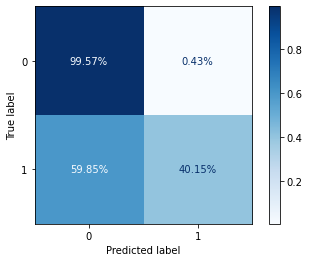

In [17]:
#Evaluating the Model 
# Acurracy of the model on Train data
print("The Training Accuracy is:", log_reg.score(X_train, y_train))

#Accuracy of the model on Test data 
print("The Test Accuracy is:", log_reg.score(X_test, y_test))

#Classification Report 
print(classification_report(y_train, y_predict))

#Confussion matrix  
plot_confusion_matrix(log_reg, X_test, y_test,cmap="Blues",normalize="true",values_format=".2%")

AxesSubplot(0.125,0.125;0.775x0.755)


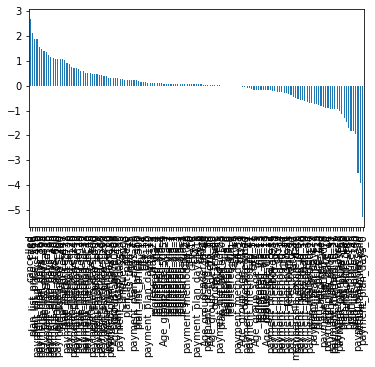

In [18]:
# Understand the weights of all the variables
weights = pd.Series(log_reg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


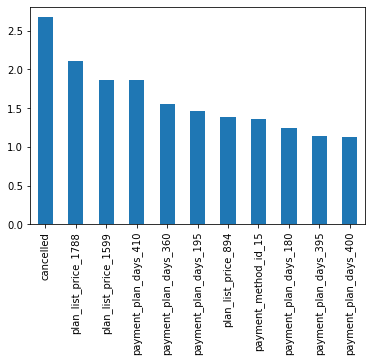

In [19]:
#Positive realtions of weight ( Increasing the probability of Churn)
weights = pd.Series(log_reg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:11].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


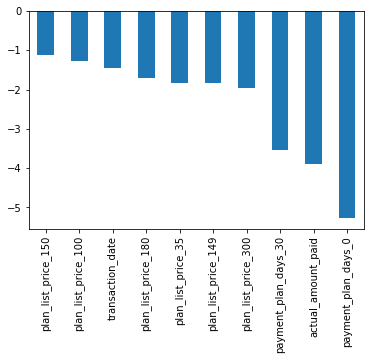

In [20]:
#Positive realtions of weight ( Increasing the probability of Churn)
weights = pd.Series(log_reg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [21]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

cm = confusion_matrix(y_train, y_predict)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.99461374 0.38983051]
The Precision is: [0.92725628 0.90248902]
The False positive rate is: [0.61016949 0.00538626]
The False Negative Rate is:  [0.00538626 0.61016949]

The average TPR is: 0.6922221253553006
The average Precision is: 0.9148726479470568
The average False positive rate is: 0.30777787464469947
The average False Negative Rate is: 0.30777787464469947


In [22]:
#Logarithmic loss or Log loss
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))



The Log Loss on Training is:  0.2336753795768172
The Log Loss on Testing Dataset is:  0.22978296282528854


# Random Forest

In [23]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =15, max_features = "auto",
                                  max_leaf_nodes = 30, criterion='entropy', max_depth=10)
model_rf.fit(X_train, y_train)


#Predic result of model
y_predict=model_rf.predict(X_train)

#Predict probability
pred_proba=model_rf.predict_proba(X_train)


The Training Accuracy is: 0.9306623986783004
The Test Accuracy is: 0.9311297254739994
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17133
           1       0.96      0.42      0.58      2236

    accuracy                           0.93     19369
   macro avg       0.95      0.71      0.77     19369
weighted avg       0.93      0.93      0.92     19369



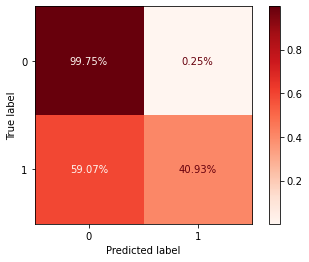

In [24]:
#Evaluating the Model 
# Acurracy of the model on Train data
print("The Training Accuracy is:", model_rf.score(X_train, y_train))

#Accuracy of the model on Test data 
print("The Test Accuracy is:", model_rf.score(X_test, y_test))

#Classification Report 
print(classification_report(y_train, y_predict))

#Confussion Matrix
plot_confusion_matrix(model_rf, X_test, y_test,cmap="Reds",normalize="true",values_format=".2%")

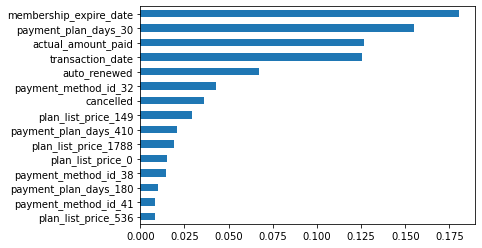

In [25]:
#Feature importance that increase the probability of Churn
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

## The radom forest model results provide different values of importance for churn customers. The principal features to predict when customers will churn is membership expire date, payment_plan_days_30 and transaction_date. Does 3 fetures are closely correlated with each other.

In [26]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

cm = confusion_matrix(y_train, y_predict)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.99795716 0.41502683]
The Precision is: [0.92893622 0.96365524]
The False positive rate is: [0.58497317 0.00204284]
The False Negative Rate is:  [0.00204284 0.58497317]

The average TPR is: 0.7064919961655352
The average Precision is: 0.9462957302401165
The average False positive rate is: 0.2935080038344648
The average False Negative Rate is: 0.2935080038344648


In [27]:
#Logarithmic loss or Log loss
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.1778975827916242
The Log Loss on Testing Dataset is:  0.23323221695700982


# Compare both models

Text(0.5, 1.0, 'Random Forest')

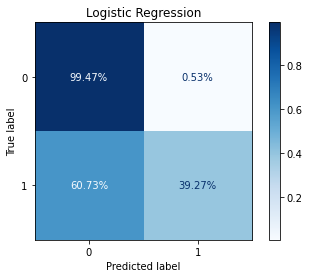

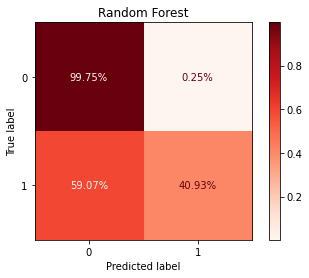

In [28]:
#Confussion matrix  
plot_confusion_matrix(log_reg, X_test, y_test,cmap="Blues",normalize="true",values_format=".2%")
# Add title and axis names
plt.title('Logistic Regression')

plot_confusion_matrix(model_rf, X_test, y_test,cmap="Reds",normalize="true",values_format=".2%") 
# Add title and axis names
plt.title('Random Forest')



AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'value of Importance')

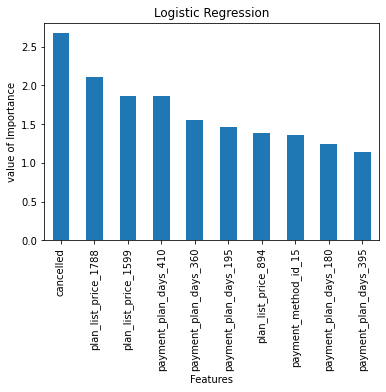

In [29]:
#Feature importance for Logistic Regression
weights = pd.Series(log_reg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))
# Add title and axis names
plt.title('Logistic Regression')
plt.xlabel('Features')
plt.ylabel('value of Importance')

Text(0, 0.5, 'Features')

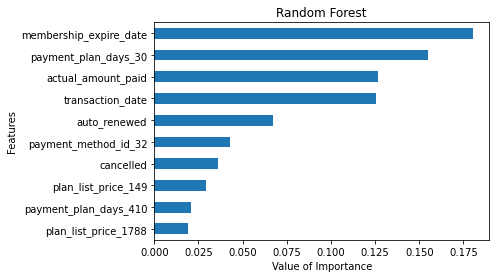

In [30]:
#Feature importance of Random Forest 
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Add title and axis names
plt.title('Random Forest')
plt.xlabel('Value of Importance')
plt.ylabel('Features')

# K-Means

In [31]:
# Create a training set 'X' with every column except 'Pace'
X_km = customer_churn_dummies.drop('is_churn', axis=1)
X_km.shape

(96848, 145)

In [32]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X_km)
X_scaled.shape

(96848, 145)

In [33]:
#Calculating best K values 
inertia = []
k = list(range(1, 11))

# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=15)
    km=km.fit(X_scaled)
    u=km.inertia_
    inertia.append(u)
    print("The innertia for :", i, "Clusters is:", u)

The innertia for : 1 Clusters is: 495185.40810211294
The innertia for : 2 Clusters is: 418205.05345301545
The innertia for : 3 Clusters is: 365634.7338462368
The innertia for : 4 Clusters is: 340851.4686001102
The innertia for : 5 Clusters is: 320648.238010468
The innertia for : 6 Clusters is: 308207.4467687742
The innertia for : 7 Clusters is: 298844.55755914806
The innertia for : 8 Clusters is: 291286.05520025507
The innertia for : 9 Clusters is: 279366.41440885764
The innertia for : 10 Clusters is: 271740.50001174695


In [34]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [35]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=15)

# Fit the model
model.fit(X_scaled)

#Model labels
model.labels_

# Predict clusters
predictions = model.predict(X_scaled)



In [36]:
#Calculating the count of customers per cluster 
unique,counts=np.unique(predictions, return_counts=True)
counts=counts.reshape(1,4)

#Creation a dataframe with customer count
countscldf=pd.DataFrame(counts,columns=["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,25049,24389,18851,28559


Explained variance ratio (first two components): [0.16462697 0.11234737]


<Figure size 432x288 with 0 Axes>

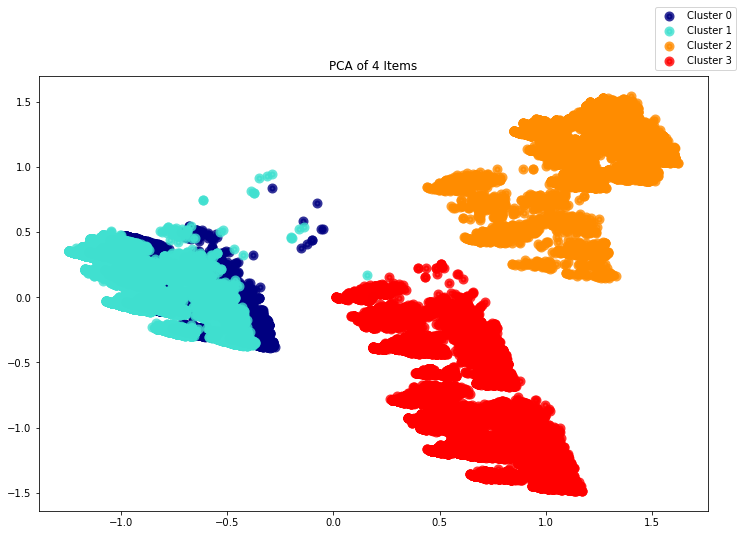

In [37]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"]

pca = PCA(n_components=2, random_state = 15)
X_r = pca.fit(X_scaled).transform(X_scaled)

# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 4

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.6)   
plt.title('PCA of 4 Items')
plt.show()

Total Variance in our dataset is:  5.113069151363648
The 95% variance we want to have is:  4.857415693795465

Variance explain with 30 n_compononets:  4.749225760671877
Variance explain with 35 n_compononets:  4.855175107108284
Variance explain with 40 n_compononets:  4.937270957805723
Variance explain with 41 n_compononets:  4.950468730758946


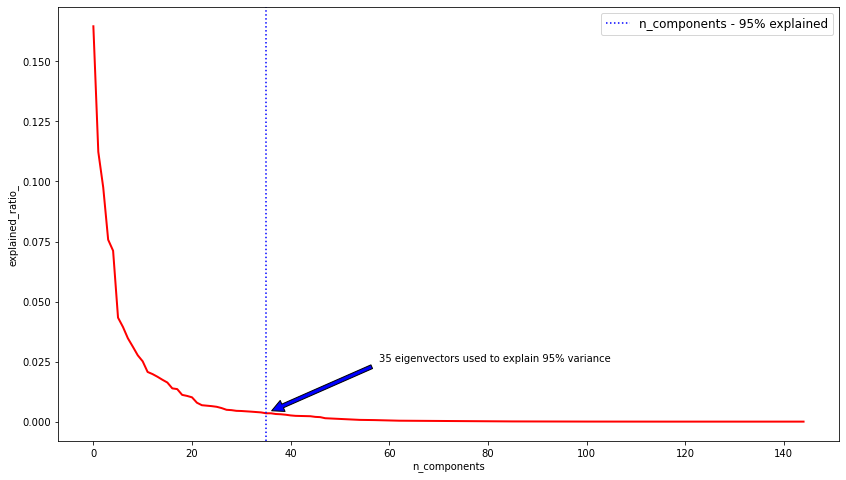

In [38]:
#Identify the Best number of components 
# Trying with Dimentionality reduction and then Kmeans

n_components = X_scaled.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 15)
X_r = pca.fit(X_scaled).transform(X_scaled)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))


# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(35,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('35 eigenvectors used to explain 95% variance', xy=(35, pca.explained_variance_ratio_[35]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 1 Clusters is: 470207.31433657743
The innertia for : 2 Clusters is: 393227.56465799105
The innertia for : 3 Clusters is: 340666.06889063364
The innertia for : 4 Clusters is: 315883.18064254784
The innertia for : 5 Clusters is: 295681.33620053856
The innertia for : 6 Clusters is: 282792.4307102129
The innertia for : 7 Clusters is: 274799.56672409916
The innertia for : 8 Clusters is: 262974.8218909939
The innertia for : 9 Clusters is: 255993.68401164535
The innertia for : 10 Clusters is: 246634.87043875444


Text(0.5, 1.0, 'Inertia Plot per k')

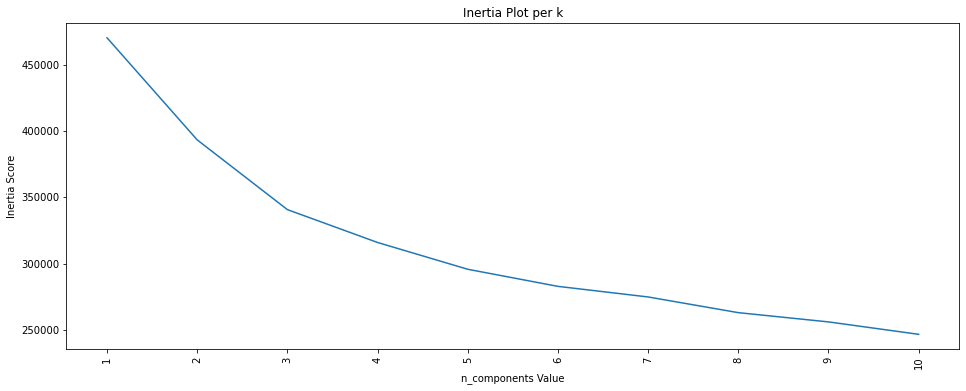

In [39]:
# Running PCA again

pca = PCA(n_components=35, random_state = 15)
X_r = pca.fit(X_scaled).transform(X_scaled)

inertia = []

#Creating the elbow curve with new optimized data

for f in k:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)


# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(k))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(k, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

## After runnin PCA we were able to imporve the results by reducin inertia. 

Explained variance ratio (first two components): [0.16462697 0.11234737]


<Figure size 432x288 with 0 Axes>

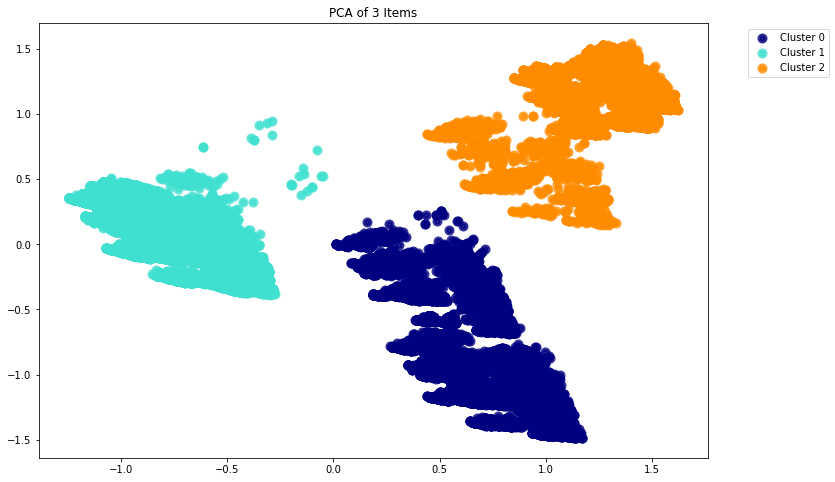

In [40]:
# Running K means on 3 clusters

kmeans = KMeans(n_clusters=3, random_state=15)
kmeans = kmeans.fit(X_scaled)

predictions = kmeans.predict(X_scaled)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 15)
X_r = pca.fit(X_scaled).transform(X_scaled)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 4


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 3 Items')
plt.show()

In [41]:
#Running PCA with 35 PC
pca = PCA(n_components=35, random_state = 15)
X_r = pca.fit(X_scaled).transform(X_scaled)

# Running Kmeans with 3 Ks
kmeans = KMeans(n_clusters=3, random_state=15)
kmeans = kmeans.fit(X_r)

# Predict clusters
predictions = kmeans.predict(X_r)

clusters = kmeans.labels_
clusters.shape

(96848,)

In [42]:
customer_churn_dummies['Cluster']=pd.Series(predictions,index=customer_churn_dummies.index)
customer_churn_dummies.shape

(96848, 147)

In [43]:
#Export dataframe with combined 
customer_churn_dummies.to_csv("final_kmeans.csv",index=False)